In [929]:
from fastai.imports import *
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import torch
from torch import tensor


np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [930]:
from fastai.data.external import untar_data, URLs
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/Users/cactus/.fastai/data/mnist_sample/valid'),Path('/Users/cactus/.fastai/data/mnist_sample/labels.csv'),Path('/Users/cactus/.fastai/data/mnist_sample/train')]

In [931]:
(path/'train').ls()

(#2) [Path('/Users/cactus/.fastai/data/mnist_sample/train/7'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3')]

In [932]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/cactus/.fastai/data/mnist_sample/train/3/10091.png')...]

In [933]:
from fastai.vision.all import *

In [934]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [935]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [936]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [937]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [938]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)
     

(6131, 6265)

In [939]:
a = tensor([0, 1, 2])
b = tensor([1, 1, 1])
torch.stack([a, b])

tensor([[0, 1, 2],
        [1, 1, 1]])

In [940]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.ndim, stacked_threes.shape

(3, torch.Size([6131, 28, 28]))

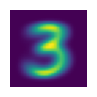

In [941]:
# the ideal 3
mean3 = stacked_threes.mean(0)
show_image(mean3);

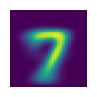

In [942]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

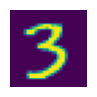

In [943]:
# a sample 
a_3 = stacked_threes[1]
show_image(a_3);

How can you calculate how different are the two arrays?

In [944]:
# just mean3 - a_3 is no good
# because some values would become negative and some would be 0 so cancel out

# data scientists often use
# the mean absolute difference (L1 Norm)
dist_3_abs = (a_3 - mean3).abs().mean()

# or the Root Mean Squared Error RMSE (L2 Norm)
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

# when to use which?
# L2 norm MSE:  penalize bigger mistakes more heavily and tolerate small mistakes
# can you think of a use case?

(tensor(0.1114), tensor(0.2021))

<Axes: >

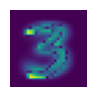

In [945]:
show_image((a_3 - mean3).abs())

In [946]:
# L1 and L2 are already available in pytorch
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()
     


(tensor(0.1586), tensor(0.3021))

Tensors gymanstics

In [947]:
tns = tensor([
    [1, 2, 3],
    [4, 5, 6]
])

In [948]:
tns[1]

tensor([4, 5, 6])

In [949]:
tns[:,1]

tensor([2, 5])

In [950]:
tns[1,1:]

tensor([5, 6])

Can you guess the shapes of those things? What do these vectors represent?

In [951]:
# we want ratio, so we divide by the max value possible which is the max value of a pixel (255)
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / valid_3_tens.max()

valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float() / valid_3_tens.max()
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [952]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

In [953]:
# lets compare a_3 to the ideal_3
a_3.shape, mean3.shape, mnist_distance(a_3, mean3)
# it works! we are just comparing an image to an image 2d to 2d

(torch.Size([28, 28]), torch.Size([28, 28]), tensor(0.1114))

In [954]:
# what if we want to compare any image to the ideal_3 to see if for each image it's a 3 or not?
# you would probably do that:
for a_3 in three_tensors:
    dist = mnist_distance(a_3 / 255, mean3)
    print(dist)

tensor(0.1074)
tensor(0.1114)
tensor(0.1100)
tensor(0.1154)
tensor(0.1300)
tensor(0.1700)
tensor(0.1158)
tensor(0.1414)
tensor(0.1265)
tensor(0.1356)
tensor(0.1100)
tensor(0.1162)
tensor(0.1286)
tensor(0.1511)
tensor(0.1210)
tensor(0.1146)
tensor(0.1133)
tensor(0.1137)
tensor(0.1470)
tensor(0.1194)
tensor(0.1414)
tensor(0.1199)
tensor(0.1811)
tensor(0.1151)
tensor(0.1648)
tensor(0.1447)
tensor(0.1098)
tensor(0.1445)
tensor(0.1154)
tensor(0.1108)
tensor(0.1126)
tensor(0.1258)
tensor(0.1077)
tensor(0.1224)
tensor(0.1331)
tensor(0.1401)
tensor(0.1423)
tensor(0.1396)
tensor(0.1472)
tensor(0.1343)
tensor(0.1264)
tensor(0.1630)
tensor(0.1210)
tensor(0.1291)
tensor(0.1304)
tensor(0.1117)
tensor(0.1270)
tensor(0.1808)
tensor(0.1280)
tensor(0.1207)
tensor(0.1300)
tensor(0.1202)
tensor(0.1570)
tensor(0.1702)
tensor(0.1255)
tensor(0.1280)
tensor(0.1242)
tensor(0.1337)
tensor(0.1172)
tensor(0.1351)
tensor(0.1175)
tensor(0.1273)
tensor(0.1199)
tensor(0.1261)
tensor(0.1585)
tensor(0.1287)
tensor(0.1

In [2]:
# broadcasting!
# in ML we should avoid writing any loops, because we got optimized API to do stuff like that

# first we need to convert the three_tensors into a tensor instead of a list
type(three_tensors), torch.stack(three_tensors).shape

NameError: name 'three_tensors' is not defined

In [956]:
# then we can let mnist_distance do the broadcasting

stacked_threes = torch.stack(three_tensors).float()
# if we don't specify which axis, we would get the mean of the mean
# (stacked_threes-mean3).abs().mean((1, 2))

# better way is to say last 2 dimension (last one and second to last)
# /!\ (-1, -2) is different than (-2, -1)
(stacked_threes-mean3).abs().mean((-1, -2))

tensor([36.3602, 36.2508, 36.5192, 44.7669, 40.2137, 52.9154, 42.7004,  ..., 20.8352, 41.6038, 29.9445, 26.8843, 40.9109, 28.8896,
        35.8195])

In [957]:
# a bit big, we forgot to normalize values

# this doesn't work in brodacasting!
# stacked_threes /= 255

# only this work
stacked_threes = stacked_threes / 255
(stacked_threes-mean3).abs().mean((-1, -2))

tensor([0.1074, 0.1114, 0.1100, 0.1154, 0.1300, 0.1700, 0.1158,  ..., 0.1275, 0.1188, 0.1319, 0.1210, 0.1316, 0.1220, 0.1267])

In [958]:
# so that's the same result as 
mnist_distance(stacked_threes, mean3)

tensor([0.1074, 0.1114, 0.1100, 0.1154, 0.1300, 0.1700, 0.1158,  ..., 0.1275, 0.1188, 0.1319, 0.1210, 0.1316, 0.1220, 0.1267])

In [959]:
# cool but it still doesn't tell us if it's a 3 or not
# how about this
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

# if it's not a 7, then it must be a 3! dumb yes, but for now it works
# let's test this on a sample

is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [960]:
# as expected 7 are not 3
is_3(valid_7_tens)

tensor([False, False, False, False, False, False, False,  ..., False, False, False, False, False, False, False])

In [961]:
# however some 3 look like 7??? so the definition of the ideal 3 is not good enough
is_3(valid_3_tens)

tensor([ True,  True,  True,  True,  True,  True,  True,  ..., False,  True,  True, False,  True,  True,  True])

In [962]:
# Let's check the accuracy
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,

(tensor(0.9168), tensor(0.9815))

In [963]:
# and the accuracy of the our "model"
(accuracy_3s+accuracy_7s)/2

tensor(0.9492)

In [964]:
# ok cool, but here we are just comparing 3 and 7
# we can figure out if it's a 3 or 7
# but it's not perfect, we saw that sometimes we think 3 are 7
#
# and the main issue here also is that we only classify 3 and 7 not other numbers
# our acc will be even worse if we include more cases

# A Simple SGD

### What's a gradient

Remember derivative of x^2 is 2x

In [1066]:
def power(x): return (x**2).sum()

xt = tensor([3., 4., 10.]).requires_grad_()
xt


tensor([ 3.,  4., 10.], requires_grad=True)

In [1067]:
yt = power(xt)
yt


tensor(125., grad_fn=<SumBackward0>)

In [1068]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### End-to-End SGD Example

In [1069]:
times = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

We've added a bit of random noise, since measuring things manually isn't precise. This means it's not that easy to answer the question: what was the roller coaster's speed?

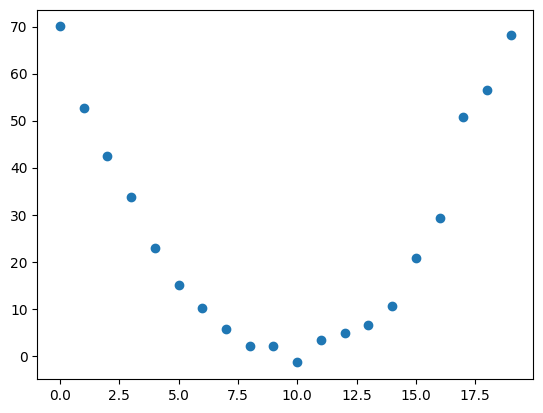

In [1070]:
speeds = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(times,speeds);

Let's cheat a bit, instead of trying a random function, seems like the data look like a quadratic, so let's try to fit a quadratic to these data.

In [1071]:
def f(x):
    return x**2 + x
     

As discussed earlier, that's fixed function, in order to optimize a function we need weights, so let's introduce some weights that we can tweak through SGD!

In [1072]:
def f(x, weights):
    w1,w2,w3 = weights
    return w1*(x**2) + (w2*x) + w3
     

What do we optimize for? We need to define a cost function, that will tell us how far we are from the goal!
This function will tell us the distance between our predicted points and the actual points, and our goal is to minimize this distance

In [1073]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [1074]:
# Step1: Initialize Param
weights = torch.randn(3).requires_grad_()
weights
# our three pumps that will be used to adjust our function shape

tensor([ 0.5315, -2.2206, -1.5167], requires_grad=True)

In [1075]:
# Step2: Forward pass - Calculate Predictions
preds = f(time, weights)

# xs and ys
time, preds

(tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]),
 tensor([ -1.5167,  -3.2058,  -3.8319,  -3.3949,  -1.8949,   0.6682,   4.2944,   8.9835,  14.7357,  21.5510,  29.4293,  38.3707,  48.3751,
          59.4426,  71.5731,  84.7666,  99.0232, 114.3429, 130.7256, 148.1713], grad_fn=<AddBackward0>))

In [1076]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speeds)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

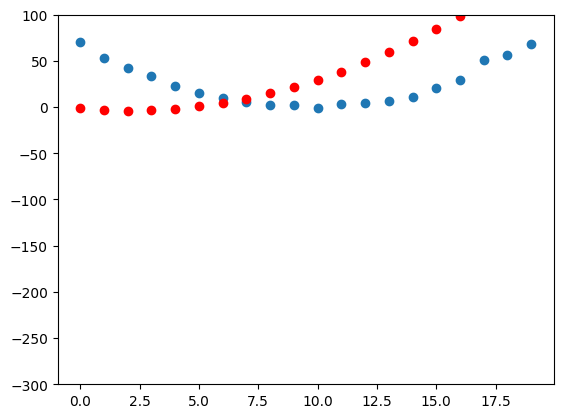

In [1077]:
show_preds(preds)

In [1078]:
# Step3: Calculate Loss / Distance to target
# we calculate our predictions to reality, (the observed speeds)
loss = mse(preds, speeds)
loss

tensor(2434.1746, grad_fn=<MeanBackward0>)

In [1079]:
# Step4: Compute Gradients
loss.backward()
weights.grad

tensor([13905.0312,   860.3478,    35.4228])

In [1080]:
# Step5: Adjust the pumps
lr = 1e-5 #size of our step
weights.data -= lr * weights.grad.data
weights.grad = None

In [1081]:
preds = f(times, weights)
mse(preds, speeds)

tensor(1041.5586, grad_fn=<MeanBackward0>)

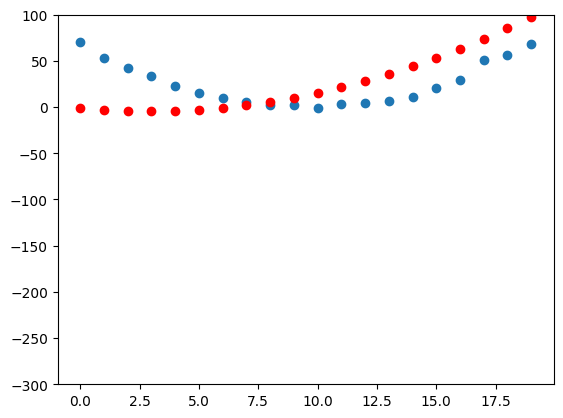

In [1082]:
show_preds(preds)

In [1083]:
def one_epoch(weights, prn=True):
    preds = f(time, weights)
    loss = mse(preds, speeds)
    loss.backward()
    weights.data -= lr * weights.grad.data
    weights.grad = None
    if prn: print(loss.item())
    return preds

In [1084]:
for i in range(10): one_epoch(weights)

1041.55859375
778.0196533203125
728.1363525390625
718.6832885742188
716.8809814453125
716.5262451171875
716.4456176757812
716.4166870117188
716.3975830078125
716.3804931640625


The loss is going down as expected! But what we don't see here is that we completely changed the shape of our function, the weights helped us carve the function to find the best quadratic function possible.

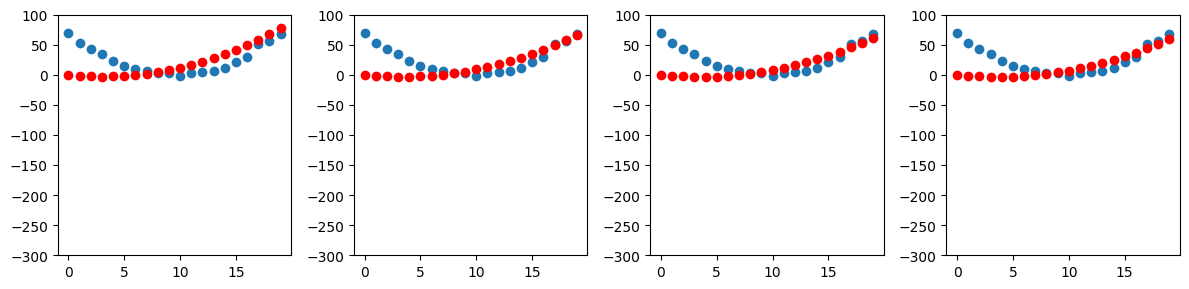

In [1096]:
# we reset the weights, to start the process from scratch (just for visualization)
weights = torch.randn(3).requires_grad_()

_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(one_epoch(weights, False), ax)
plt.tight_layout()

In [1098]:
# Step7: stop
# In practice we would need to look at the training loss and the metric
# to see if training loss keeps decreasing and metric keep improving, we can continue,
# otherwise we might be overfitting!

# Applying our Simple SGD to MNIST

To recap here are the steps for SGD, first we initialize the weights, then:
1. we do a forward pass, we pass our data through the layers weights
2. we calculate the loss
3. we compute the gradients
4. we update the weights with the gradients * learning rate
5. we repeat until our metric get worse

### Preprocess

In [1164]:
# first reshape the tensors into tensors of pixels instead of 2d pixels
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

In [1166]:
# we do the same for our validation set
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
x,y = valid_dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

### 0. Initialize Weights

In [1168]:
def init_weights(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

weights = init_weights((28*28, 1))
weights.shape

torch.Size([784, 1])

In [1299]:
# The weights are not flexible enough, we also need a bias term, remember y=ax+c (or y=wx+b)
def init_weights(size, std=1.0):
    w = (torch.randn(size)*std).requires_grad_()
    b = torch.randn(1).requires_grad_()
    return w, b
weights = init_weights((28*28, 1))
# (our w here is actually our layers but it's ok)
w, b = weights
w.shape, b.shape

(torch.Size([784, 1]), torch.Size([1]))

### 1. Forward Pass

In [1263]:
train_x.shape, weights[0].shape, weights[1].shape

(torch.Size([12396, 784]), torch.Size([784, 1]), torch.Size([1]))

In [1309]:
def forward(inputs, weights):
    w, b = weights
    res = inputs@w + b
    # res = res.sigmoid()
    return res

forward(train_x, weights)

tensor([[46.1364],
        [36.1163],
        [42.8203],
        [45.5632],
        [42.2849],
        [56.4122],
        [51.6856],
        ...,
        [39.6319],
        [25.2801],
        [34.4028],
        [47.6761],
        [29.6784],
        [34.0573],
        [34.2799]], grad_fn=<AddBackward0>)

In the forwad pass, what we basically do is multiply each row of pixel by 784 coeffs, these coeffs/weights, are like the judge of if this whole set of pixel (so image) is a 7 or a 3.

Of course during the forwad pass their opinion is just garbage, because we haven't done anything than multiplying than random opinion really at this point.

Think of what a neural net does (marie kondo), it organize data accross spaces, we moved the input into another space (the only problem is that the space doesn't make any sense right now)

### 2. Metric 

So as we said earlier our predictions, the judges opinion are garbage right now. What we did really thinking about marie kondo is: moving the data accross a new space, but that new space has not been shaped properly yet lol.

Nonethless, we can get an idea on how well our spaces are organized in our model by calculting the accuracy of the logits/preds

In [1310]:
# note that we compare to valid_y this time, we compare the filter/judge opinions created to new data valid_x
def calc_accuracy_7_or_3(weights, valid_x, valid_y):
    # we calculate prediction on new inputs
    preds = forward(inputs=valid_x, weights=weights)
    # compare these predictions to expected predictions (reality)
    corrects = preds.float().mean().item() == valid_y
    return corrects.float().mean().item()
    

calc_accuracy_7_or_3(weights, valid_x, valid_y)
# valid_y.shape, calc_accuracy_7_or_3(weights, valid_y)

0.0

0 ACCURACY! AS EXPECTED LOL!

### 3. Calculating Loss

But it's perfectly normal to have 0 accuracy, don't be discouraged, after all we haven't done anything that multiplying the pixels by random number. 

So what should we do now? How to predict a 7 or 3? Well I don't know, the thing is you forgot that we are not doing programming. We are doing machine learning, we are training the model to accomplish the task, we are not telling the model HOW to do the task.

So, how do we ask the model to learn? We need to give it a target to reach first, we need to tell it a cost function to minimize.

How do we calculate the loss? The distance to our target? Why not just use accuracy? Well let's try:

In [1358]:
# a loss is essentially a distance between vectors
def calc_loss(preds, targets):
    # dist =  (preds - targets).abs().float()
    preds = preds.sigmoid()
    dist = torch.where(targets==1, 1-preds, preds)
    return dist.mean()

# we are doing almost the same as accuracy, but we are not using the equal sign, because the equal sign is not differentiable
# it doesn't give us a continuous value, it only give us 0 (False) or 1 (True)

# note we are using trainig dataset    
preds = forward(inputs=train_x, weights=weights)
loss = calc_loss(preds, tensor([1,0,1]))
loss
# loss.backward()

tensor(0.6652, grad_fn=<MeanBackward0>)

### 4. Computing Gradients

In [1331]:
loss.backward()

### 5. Update Gradients with Learning Rate

In [1352]:
lr = 0.01

def update_weights(weights, lr):
    with torch.no_grad():
        w,b = weights
        w.sub_(w.grad * lr)
        w.grad.zero_() 
        b.sub_(b.grad * lr)
        b.grad.zero_() 


update_weights(weights, lr)

### 6. Monitor Metric in comparison to Loss

In [1333]:
loss, calc_accuracy_7_or_3(weights=weights, valid_x=valid_x, valid_y=valid_y)

(tensor(-0.3333, grad_fn=<MeanBackward0>), 0.0)

### 7. Rinse and Repeat

In [1405]:
def one_epoch(epoch_idx, weights, lr):
    preds = forward(inputs=train_x, weights=weights)
    loss = calc_loss(preds, train_y)
    loss.backward()
    # update_weights(weights, lr)
    with torch.no_grad():
        w,b = weights
        w.sub_(w.grad * lr)
        w.grad.zero_() 
        b.sub_(b.grad * lr)
        b.grad.zero_() 
    acc = calc_accuracy_7_or_3(weights=weights, valid_x=valid_x, valid_y=valid_y)
    print(f'epoch: {epoch_idx} | loss: {loss} | acc: {acc}')
    print(weights[0][:3])
    return weights

# _,axs = plt.subplots(1,4,figsize=(12,3))
# for ax in axs: show_preds(one_epoch(weights), ax)
# plt.tight_layout()
lr = 0.1
weights = init_weights((28*28, 1))
for i in range(100):
    one_epoch(i, weights, lr=lr)

torch.Size([3, 1])
epoch: 0 | loss: 6.3143205642700195 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 1 | loss: 5.487278461456299 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 2 | loss: 5.149522304534912 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 3 | loss: 4.961963653564453 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 4 | loss: 4.835623741149902 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 5 | loss: 4.733791828155518 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
        [-0.2921]], grad_fn=<SliceBackward0>)
torch.Size([3, 1])
epoch: 6 | loss: 4.643887996673584 | acc: 0.0
tensor([[-0.9963],
        [ 0.4365],
  

### 8. Why it doesn't train?

First, what do you mean by it doesn't train?
What should you expect?
- the loss to go down
- metric to go up

Metric will not go up if training loss is not going down, so what is going on with the loss here? How can we have a negative loss?

Let's check our loss function and see what we are feeding it

In [1501]:
def forward(inputs, weights):
    w, b = weights
    res = inputs@w + b
    # res = res.sigmoid()
    return res

# note that we compare to valid_y this time, we compare the filter/judge opinions created to new data valid_x
def calc_accuracy_7_or_3(weights, valid_x, valid_y):
    # we calculate prediction on new inputs
    preds = forward(inputs=valid_x, weights=weights)
    # compare these predictions to expected predictions (reality)
    corrects = (preds.sigmoid() > 0.5) == valid_y
    return corrects.float().mean()
    # corrects = preds.float().mean().item() == valid_y
    # return corrects.float().mean().item()

def calc_loss(preds, targets):
    # print(targets[:5])
    # the problem is that we are not handling negative value correctly
    preds = preds.sigmoid()
    # dist =  (preds - targets).abs().float()
    dist = torch.where(targets==1, 1-preds, preds)
    return dist.mean()

lr = 0.03
# 0. init weight
weights = init_weights((28*28, 1))

for epoch_idx in range(1000):
    # 1. forward pass
    w, b = weights
    preds = train_x@w + b

    # 2. calculate loss
    loss = calc_loss(preds=preds, targets=train_y)

    # 3. backpropagate gradients
    loss.backward()

    # 4. update weights
    with torch.no_grad():
        w.sub_(w.grad * lr)
        w.grad.zero_() 
        b.sub_(b.grad * lr)
        b.grad.zero_() 

    # 5. calc accuracy
    acc = calc_accuracy_7_or_3(weights=weights, valid_x=valid_x, valid_y=valid_y)
    print(f'epoch: {epoch_idx} | loss: {loss} | acc: {acc}')

epoch: 0 | loss: 6.053243160247803 | acc: 0.4676153063774109
epoch: 1 | loss: 5.6034955978393555 | acc: 0.47448480129241943
epoch: 2 | loss: 5.248191833496094 | acc: 0.47939157485961914
epoch: 3 | loss: 4.974897861480713 | acc: 0.48822376132011414
epoch: 4 | loss: 4.769471168518066 | acc: 0.491167813539505
epoch: 5 | loss: 4.618328094482422 | acc: 0.4946025609970093
epoch: 6 | loss: 4.504344940185547 | acc: 0.4950932264328003
epoch: 7 | loss: 4.415410041809082 | acc: 0.5
epoch: 8 | loss: 4.3465986251831055 | acc: 0.49803727865219116
epoch: 9 | loss: 4.292709827423096 | acc: 0.5039254426956177
epoch: 10 | loss: 4.248377799987793 | acc: 0.5068694949150085
epoch: 11 | loss: 4.211176872253418 | acc: 0.5088322162628174
epoch: 12 | loss: 4.179232597351074 | acc: 0.5093228816986084
epoch: 13 | loss: 4.150620937347412 | acc: 0.5122669339179993
epoch: 14 | loss: 4.124207973480225 | acc: 0.5147203207015991
epoch: 15 | loss: 4.099379539489746 | acc: 0.5142296552658081
epoch: 16 | loss: 4.07566070

Loss is now going down, but accuracy doesn't improve at all?! Let's check what are the values of our predictions. Then we will double check the accuracy function as well.

### 9. Check your activation function/weights and gradients

It's one thing to say we let the model learn stuff, and not let it adjust mysterious logits, it's another thing to just hope that it will reach a target if we didn't tell you how to reach it.

The problem is at the end of the forward pass, we don't have activation function to define, what is a 3 or what is a 7, or did we? I DUNNO? I THOUGHT JUST HAVING A LABEL_Y SAYING THIS ROW IS 1 SHOUDL MAKE THE MODEL TRY TO REACH FOR 1??

### Putting It All Together

In [1]:
dl = DataLoader(dset, batch_size=256)
xb,yb= first(dl)
xb.shape, yb.shape


NameError: name 'DataLoader' is not defined

In [1516]:
weights = init_weights((28*28,1))
weights[0].shape, weights[1].shape

(torch.Size([784, 1]), torch.Size([1]))

In [1506]:
# do the same for validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

In [1543]:
def calc_accuracy(preds, yb):
    preds = preds.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def calc_loss(preds, targets):
    preds = preds.sigmoid()
    # dist =  (preds - targets).abs().float()
    # return dist.mean()
    dist = torch.where(targets==1, 1-preds, preds)
    return dist.mean()

def model(weights, x):
    w, b = weights
    res = x@w+ b
    return res

def calc_grad(model, x, y, weights):
    preds = model(weights, x)
    loss = calc_loss(preds=preds, targets=y)
    loss.backward()
    return loss


def validate_epoch(model, weights, valid_dl):
    accs = [calc_accuracy(model(weights, x=xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


def train_epoch(model, lr, weights):
    loss = []
    for xb,yb in dl:
        loss.append(calc_grad(model, xb, yb, weights=weights))
        for w in weights: #weights and biases
            w.data -= w.grad*lr
            w.grad.zero_()
    return round(torch.stack(loss).mean().item(), 4)

lr = 1.
for i in range(20):
    loss = train_epoch(model, lr, weights=weights)
    acc = validate_epoch(model, weights=weights, valid_dl=valid_dl)
    print(f'epoch {i} | loss: {loss} | acc: {acc}')

epoch 0 | loss: 0.0062 | acc: 0.977
epoch 1 | loss: 0.0062 | acc: 0.977
epoch 2 | loss: 0.0062 | acc: 0.977
epoch 3 | loss: 0.0062 | acc: 0.977
epoch 4 | loss: 0.0062 | acc: 0.977
epoch 5 | loss: 0.0062 | acc: 0.977
epoch 6 | loss: 0.0062 | acc: 0.977
epoch 7 | loss: 0.0062 | acc: 0.977
epoch 8 | loss: 0.0062 | acc: 0.977
epoch 9 | loss: 0.0062 | acc: 0.977
epoch 10 | loss: 0.0062 | acc: 0.9774
epoch 11 | loss: 0.0062 | acc: 0.9774
epoch 12 | loss: 0.0062 | acc: 0.9774
epoch 13 | loss: 0.0062 | acc: 0.9774
epoch 14 | loss: 0.0062 | acc: 0.9774
epoch 15 | loss: 0.0062 | acc: 0.9774
epoch 16 | loss: 0.0062 | acc: 0.9774
epoch 17 | loss: 0.0062 | acc: 0.9774
epoch 18 | loss: 0.0062 | acc: 0.9774
epoch 19 | loss: 0.0062 | acc: 0.9774


### Creating an Optimizer using Frameworks

In [1531]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [1532]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [1575]:
def validate_epoch(model, valid_dl):
    accs = [calc_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

def calc_grad(model, x, y):
    preds = model(x)
    loss = calc_loss(preds=preds, targets=y)
    loss.backward()
    return loss

def train_epoch(model, opt):
    for xb,yb in dl:
        calc_grad(model=model, x=xb, y=yb)
        opt.step()
        opt.zero_grad()

def train_model(model, opt, epochs):
    for i in range(epochs):
        train_epoch(model, opt)
        print(validate_epoch(model, valid_dl=valid_dl))

In [1580]:
opt = BasicOptim(linear_model.parameters(), lr)
train_model(linear_model, opt, 20)

0.977
0.977
0.9765
0.977
0.977
0.977
0.978
0.9785
0.9785
0.9795
0.9789
0.9789
0.9789
0.9789
0.9789
0.9789
0.9794
0.9794
0.9794
0.9794


### FastAI SGD

In [1579]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, opt, 20)

0.4932
0.7573
0.8554
0.9155
0.9346
0.9492
0.9555
0.9624
0.9653
0.9673
0.9692
0.9717
0.9721
0.9731
0.9746
0.9746
0.9755
0.976
0.9765
0.9765


### FastAI Learner

In [1586]:
dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=calc_loss, metrics=calc_accuracy)
     
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,calc_accuracy,time
0,0.507504,0.511275,0.374877,00:00
1,0.504809,0.451502,0.425908,00:00
2,0.498959,0.355736,0.535819,00:00
3,0.488851,0.286866,0.682041,00:00
4,0.474726,0.260834,0.836605,00:00
5,0.457978,0.247087,0.913641,00:00
6,0.440325,0.234638,0.939156,00:00
7,0.423025,0.224470,0.948970,00:00
8,0.406803,0.214958,0.953386,00:00
9,0.392096,0.207204,0.956330,00:00


### Why we need Nonlinearity

Many linear function = same as one linear with more weights.

Composing two linear function = another linear function

We don't want data to just pass through layer1 and end in layer2. 

We want to create a logic gate that says, these pixels have passed through layer1 and we have detected that they belong to a 3 at 5%

That's same as saying something similar in code:

```python
if px[:50] > 100:
  return activated_filter_3_at_50_pct
else:
  return not_sure
```


Without activation functions we are just doing

```python
res = l1(x*3)
res2 = l2(x*10)
res3 = l3(...)

etc without really applying any logic gate
```

In [1587]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res
     

In [1592]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)


learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=calc_loss, metrics=calc_accuracy)

learn.fit_one_cycle(20, 0.1)

epoch,train_loss,valid_loss,calc_accuracy,time
0,0.474109,0.279716,0.493131,00:00
1,0.421577,0.309252,0.505888,00:00
2,0.265262,0.295970,0.678116,00:00
3,0.142547,0.169579,0.866045,00:00
4,0.081008,0.102445,0.922964,00:00
5,0.053166,0.070826,0.943081,00:00
6,0.040275,0.054369,0.959764,00:00
7,0.033971,0.047083,0.962709,00:00
8,0.030639,0.041637,0.964671,00:00
9,0.028725,0.038003,0.965653,00:00


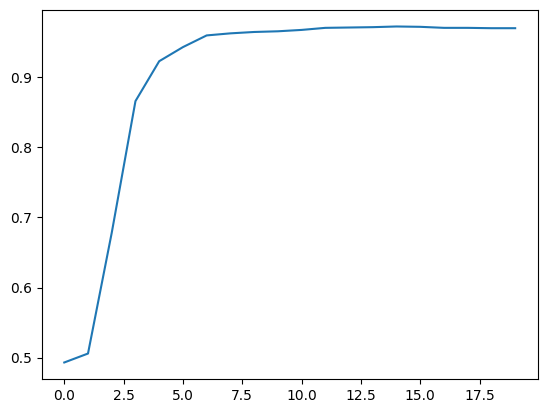

In [1593]:

plt.plot(L(learn.recorder.values).itemgot(2));

In [1594]:
f'final accuracy {learn.recorder.values[-1][2]}'

'final accuracy 0.9700686931610107'

We got almost 1.5% more than our linear model!

# Using a from Scratch Neural Net

### Loss function

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

### Tensorize

In [ ]:
def tensorize(path):
    tens = torch.stack([tensor(Image.open(o)) 
                                for o in (path).ls()])
    return tens.float() / tens.max()

three_tens = tensorize(path/'train/3')
seven_tens = tensorize(path/'train/7')
three_tens.shape, seven_tens.shape

# val_indep = 
# val_dep = 

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [ ]:
# we can't stack again since the tensors have different sizes
# currently for torch, these two tensors look like a tensor of orange and a tensor of bananas

# to tell torch we don't really care about the 6131 or 6265, it doesn't have meaning
# it's just a list that we want to concatenate,
# we use cat and tell it to do that over the first dim
trn_indep = torch.cat((three_tens, seven_tens), dim=0)
trn_indep.shape

torch.Size([12396, 28, 28])

Make sure to follow the same order (threes first, then sevens)

In [ ]:
# three_tens.shape[0]
# # # Create a tensor of size [6131] filled with 3s
# full_3 = torch.full((three_tens.shape[0],), 3)

# # Create a tensor of size [6265] filled with 7s
# full_7 = torch.full((seven_tens.shape[0],), 7)

# # Concatenate the two tensors to get a single tensor with the desired values
# trn_dep = torch.cat((full_3, full_7), dim=0)
# full_3.shape, full_7.shape, trn_dep.shape

(torch.Size([6131]), torch.Size([6265]), torch.Size([12396]))

Let's pick a random image and see if we got a matching label

this should be a 7


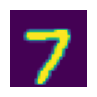

In [ ]:
# random_index = np.random.randint(0, trn_indep.shape[0])
# show_image(trn_indep[random_index])
# print('this should be a ' + str(trn_dep[random_index].item()))

Use a function to summarize all this preprocessing and also apply exactly the same thing to the validation set

this should be a 3


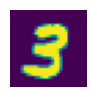

In [ ]:
def preprocess(root_path, set_path):
    three_tens = tensorize(root_path/set_path/'3')
    seven_tens = tensorize(root_path/set_path/'7')
    indep = torch.cat((three_tens, seven_tens), dim=0)

    # actually we don't need to do one hot encoding
    # calc_loss expects raw scores (logits)
    # Create a tensor of size [6131] filled with 3s
    full_3 = torch.full((three_tens.shape[0], ), 3, dtype=torch.long)

    # Create a tensor of size [6265] filled with 7s
    full_7 = torch.full((seven_tens.shape[0], ), 7, dtype=torch.long)

    # Concatenate the two tensors to get a single tensor with the desired values
    dep = torch.cat((full_3, full_7), dim=0)
    return indep, dep


def pick_random_image(indep, dep):
    random_index = np.random.randint(0, indep.shape[0])
    show_image(indep[random_index])
    print('this should be a ' + str(dep[random_index].item())) 

trn_indep, trn_dep = preprocess(path, 'train')
pick_random_image(indep=trn_indep, dep=trn_dep)

Now we do the same with validation set

this should be a 3


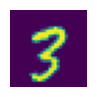

In [ ]:
val_indep, val_dep = preprocess(path, 'valid')
pick_random_image(indep=val_indep, dep=val_dep)

### Metric

In [ ]:
# how can i squash the pred to be either 3 or 7???

# ALSO NOT SURE IF WE STILL WANT SIGMOID AS ACTIVAITON FUNCITON??

# def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))


def acc(w):
    preds = calc_preds(w, val_indep)

    """
    Calculate accuracy by comparing predictions to true labels.
    
    Args:
    - predictions (torch.Tensor): Raw model predictions (logits).
    - labels (torch.Tensor): True labels (class indices).
    
    Returns:
    - accuracy (torch.Tensor): The accuracy of the predictions.
    """
    # Convert logits to class indices (highest probability class)
    _, predicted_classes = torch.max(preds, 1)
    
    # Compare predicted classes to true classes
    correct_predictions = (predicted_classes == val_dep).float()  # Convert boolean to float for mean calculation
    
    # Calculate accuracy
    accuracy = correct_predictions.mean()
    
    return accuracy

    # return error_rate(preds, targ=val_dep).item()
    # return mnist_distance(preds, val_dep)


### Arch

In [ ]:
def normalize_layer(layer, n, adjust=-0.3, n_adjust=4):
    # somehow these two lines fuck everything up?
    # i think broadcasting just doesn't work with += and /=
    # layer += adjust
    # layer /= (n * n_adjust)
    return (layer + adjust) / n * n_adjust


def init_weights(n_in, n_out):
    print('n_in: ', n_in)
    print('n_out: ',n_out)
    layerIn = torch.rand(n_in, 128)
    layerIn = normalize_layer(layerIn, 128)

    layer2 = torch.rand(layerIn.shape[-1], 64)    
    layer2 = normalize_layer(layer2, 64)

    layerOut = torch.rand(layer2.shape[-1], n_out)
    layerOut = normalize_layer(layerOut, n_out)

    # -0.5 * 0.1 are adjust help that we only figure out after trial and error
    const1 = (torch.rand(1)[0] - 0.5) * 0.1
    const2 = (torch.rand(1)[0] - 0.5) * 0.1
    const3 = (torch.rand(1)[0] - 0.5) * 0.1

    layers = [layerIn, layer2, layerOut]
    consts = [const1, const2, const3]
    for l in layers+consts: l.requires_grad_()

    return layers, consts

In [ ]:
import torch.nn.functional as F

def calc_preds(w, indeps):
    layers, consts = w
    n = len(layers)
    res = indeps
    for i, l in enumerate(layers):
        res = res@l + consts[i]
        # we add ReLU for every layers aside of the last one!
        if i != n-1:
            res = F.relu(res)
    # we want to use softmax since we doing multi classification
    # but we don't need to do it here, cuz cross entropy will already do it for us
    return res


def calc_loss(w, indeps, deps):
    preds = calc_preds(w, indeps)
    loss_fn = torch.nn.CrossEntropyLoss()
    return loss_fn(preds, deps)

In [ ]:
# def update_weights(w, lr):
#     layers,consts = w
#     for layer in layers+consts:
#         layer.sub_(layer.grad * lr)
#         layer.grad.zero_()

def one_epoch(epoch_idx, lr, trn_indep, trn_dep, w):
    loss = calc_loss(w, indeps=trn_indep, deps=trn_dep)
    loss.backward()
    with torch.no_grad():
        layers,consts = w
        for layer in layers+consts:
            layer.sub_(layer.grad * lr)
            layer.grad.zero_()
    print(f'Epoch {epoch_idx+1}: {loss.item()}, Accuracy: {acc(w)}')

def sgd(epochs, lr, trn_indep, trn_dep, w):
    for epoch_idx in range(epochs):
        one_epoch(epoch_idx, lr, trn_indep, trn_dep, w)
        

def train_deep_net(epochs, lr, trn_indep, trn_dep):
    torch.manual_seed(442)
    n_in = trn_indep.shape[-1]
    n_out = 10
    
    w = init_weights(n_in, n_out)
    sgd(epochs, lr, trn_indep, trn_dep, w)
    return w

### Using a bigger dataset

In [ ]:
path = untar_data(URLs.MNIST)
path.ls()

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(),    # Convert to grayscale if they're not already
    transforms.ToTensor(),     # Convert images to PyTorch tensors
    # transforms.Normalize((0.5,), (0.5,))
    # our custom arch converge better without it
    # it might be related ot how we structured our arch and how we initialized our weights as well
])

def tensorize_folder(path):
    dataset = ImageFolder(path, transform=transform)
    dataloader = DataLoader(dataset, shuffle=False)
    data_array = [data for data, _ in dataloader]
    label_array = [label for _, label in dataloader]
    data_tensor = torch.cat(data_array, dim=0)
    label_tensor = torch.cat(label_array, dim=0)
    return data_tensor, label_tensor

trn_indep, trn_dep = tensorize_folder(path/'training')
val_indep, val_dep = tensorize_folder(path/'testing')

trn_indep.shape, trn_dep.shape


(torch.Size([60000, 1, 28, 28]), torch.Size([60000]))

In [ ]:
def reshape_to_rows_of_pixels(tns):
    if tns.ndim == 4:
        return tns.reshape(*tns.shape[:-3], -1)
    else:
        return tns

trn_indep = reshape_to_rows_of_pixels(trn_indep)
trn_dep = reshape_to_rows_of_pixels(trn_dep)
val_indep = reshape_to_rows_of_pixels(val_indep)
val_dep = reshape_to_rows_of_pixels(val_dep)


trn_indep.shape, trn_dep.shape

(torch.Size([60000, 784]), torch.Size([60000]))

idx:42593 this should be a 7
idx:6618 this should be a 6


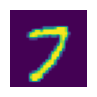

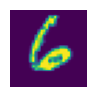

In [ ]:
def pick_random_image(indep, dep):
    random_index = np.random.randint(0, indep.shape[0])
    tns = indep[random_index]
    if tns.ndim < 2:
        show_image(indep[random_index].view(28, 28))
    else:
        show_image(indep[random_index]) 
    print(f'idx:{random_index} this should be a ' + str(dep[random_index].item())) 

pick_random_image(trn_indep, trn_dep)
pick_random_image(val_indep, val_dep)

### Training

In [ ]:
trn_indep.shape, val_indep.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

Before training we need to turn one image into a single tensor instead of a 2d tensor (why??)

In [ ]:
if trn_indep.ndim == 3:
    trn_indep = trn_indep.reshape(*trn_indep.shape[:-2], -1)
if val_indep.ndim == 3:
    val_indep = val_indep.reshape(*val_indep.shape[:-2], -1)

trn_indep.shape, trn_dep.shape, val_indep.shape, val_dep.shape

(torch.Size([60000, 784]),
 torch.Size([60000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [ ]:
epochs = 1000
lr = 0.3
trained_coeffs = train_deep_net(epochs, lr=lr, trn_indep=trn_indep, trn_dep=trn_dep)

In [ ]:
if stacked_threes.ndim == 3:
    stacked_threes = stacked_threes.reshape(*stacked_threes.shape[:-2], -1)
if stacked_sevens.ndim == 3:
    stacked_sevens = stacked_sevens.reshape(*stacked_sevens.shape[:-2], -1)

for img_tns in stacked_threes:
    # print('this should be a ' + str(dep[random_index].argmax()))
    preds = calc_preds(trained_coeffs, img_tns)
    # Convert logits to class indices (highest probability class)
    predicted_class = torch.argmax(preds)
    print(predicted_class)

tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(2)
tensor(3)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(3)
tensor(3)
tensor(7)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(2)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)


tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(8)
tensor(3)
tensor(3)
tensor(1)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(4)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(3)


In [ ]:
from kagtool.datasets.kaggle_downloader import KaggleDownloader

dataset_name = 'digit-recognizer'
creds = ''

path = KaggleDownloader(dataset_name, creds).load_or_fetch_kaggle_dataset()
tst_df = pd.read_csv(path/'test.csv')
tst_df.head()


digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tst_indep = torch.tensor(tst_df.values, dtype=torch.float)
tst_indep.shape

torch.Size([28000, 784])

In [ ]:
preds = calc_preds(trained_coeffs, tst_indep)

tst_df['ImageId'] = range(1, len(tst_df) + 1)
tst_df['Label'] = torch.argmax(preds, dim=1)
sub_df = tst_df[['ImageId','Label']]
sub_df.to_csv('sub.csv', index=False)

!head sub.csv

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0


In [ ]:
def ensemble():
    trained_coeffs = train_deep_net(epochs, lr=lr, trn_indep=trn_indep, trn_dep=trn_dep)
    return calc_preds(trained_coeffs, tst_indep)

learns = [ensemble() for _ in range(5)]
ens_preds = torch.stack(learns).mean(0)

n_in:  784
n_out:  10
Epoch 1: 2.6047489643096924, Accuracy: 0.09799999743700027
Epoch 2: 2.721940279006958, Accuracy: 0.08940000087022781
Epoch 3: 2.3067405223846436, Accuracy: 0.0908999964594841


Epoch 4: 2.30497145652771, Accuracy: 0.09109999984502792
Epoch 5: 2.3040037155151367, Accuracy: 0.09120000153779984
Epoch 6: 2.3033523559570312, Accuracy: 0.09179999679327011
Epoch 7: 2.302839994430542, Accuracy: 0.09179999679327011
Epoch 8: 2.3023743629455566, Accuracy: 0.09220000356435776
Epoch 9: 2.3018887042999268, Accuracy: 0.09189999848604202
Epoch 10: 2.301318407058716, Accuracy: 0.0925000011920929
Epoch 11: 2.3005685806274414, Accuracy: 0.09440000355243683
Epoch 12: 2.2994909286499023, Accuracy: 0.0940999984741211
Epoch 13: 2.2978010177612305, Accuracy: 0.09480000287294388
Epoch 14: 2.2949421405792236, Accuracy: 0.09520000219345093
Epoch 15: 2.289860963821411, Accuracy: 0.09619999676942825
Epoch 16: 2.2807650566101074, Accuracy: 0.09489999711513519
Epoch 17: 2.265516757965088, Accuracy: 0.09830000251531601
Epoch 18: 2.2451012134552, Accuracy: 0.10010000318288803
Epoch 19: 2.2236034870147705, Accuracy: 0.1054999977350235
Epoch 20: 2.202540159225464, Accuracy: 0.15639999508857727

In [ ]:
tst_df['ImageId'] = range(1, len(tst_df) + 1)
tst_df['Label'] = torch.argmax(ens_preds, dim=1)
sub_df = tst_df[['ImageId','Label']]
sub_df.to_csv('ens_sub.csv', index=False)

!head ens_sub.csv

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0
